In [206]:
#pip install opencv-python


In [219]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np


In [283]:
#This is a test cell. Ideally this would be turned into a function
Photo = cv2.imread('TempFiles/Aaron_Eckhart/Aaron_Eckhart_0001.jpg', 0)
#Photo = cv2.medianBlur(Photo, 5)
threshold3 = cv2.adaptiveThreshold(Photo, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 11, 2)


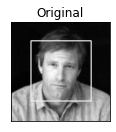

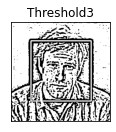

In [284]:
#image we are modifying
plt.subplot(2, 2, 1), plt.imshow(Photo, 'gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()
#Gaussian Threshold
plt.subplot(2, 2, 4), plt.imshow(threshold3, 'gray')
plt.title('Threshold3')
plt.xticks([]), plt.yticks([])
plt.show()


In [285]:
from PIL import Image

photosDirectory = []

#First we load all of our files. 
directory = 'SmallerDataSet(cleaned)/'
for file2 in os.listdir(directory):
    path = directory + file2 
    pathForTemp = "TempFiles/" + file2
    try:
        os.makedirs(pathForTemp)
    except:
        VOID = "do nothing :)"
        #This is just to skip the file already exists error
    for FilepathPhotos in os.listdir(path):
        pathForPhoto = path + "/" + FilepathPhotos
        photosDirectory.append(pathForPhoto)
        #Dont run this code it opens every single image. (Good to see what images are being used)
        #image = Image.open(pathForPhoto) 
        #image.show()
#photosDirectory stores the file path for each image we are gonna use
#photosDirectory

In [286]:
#Now we make a function that finds the faces of each picture
FaceDat = cv2.CascadeClassifier("TrainingData/haarcascade_frontalface_default.xml")
def faceDetect(path, newDir):
    Photo = cv2.imread(path)
    #Blur to remove extra noise
    Photo2 = cv2.medianBlur(Photo, 3) 
    grysc = cv2.cvtColor(Photo2, cv2.COLOR_BGR2GRAY)
    faceDetected = FaceDat.detectMultiScale(grysc, 1.1, 4)

    #This area ensures only one face is found per image
    facialPadding = 20
    #The way the algorithm works is it puts faces its less confident in first and most confident last so if multiple pictures are found we just pick the last one.
    #Should work most of the time
    if(len(faceDetected) != 1):
        x, y, w, h = faceDetected[len(faceDetected)-1]
        cv2.rectangle(Photo, ((x - facialPadding), (y - facialPadding)), ((x+w+facialPadding),(y+h+facialPadding)), (0, 255, 20), 2)
        cv2.imwrite(newDir, Photo, [cv2.IMWRITE_JPEG_QUALITY, 100])
    else:
        (x, y, w, h) = faceDetected[0]
        cv2.rectangle(Photo, ((x - facialPadding), (y - facialPadding)), ((x+w+facialPadding),(y+h+facialPadding)), (255, 255, 20), 2)
        cv2.imwrite(newDir, Photo, [cv2.IMWRITE_JPEG_QUALITY, 100])
    


In [287]:
#This recursively draws a rectangle around all of the faces we are reading.
for photos in photosDirectory:
    newDir = photos.replace("SmallerDataSet(cleaned)", "TempFiles")
    faceDetect(photos, newDir)
